In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

import statsmodels.api as sm

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

In [2]:
def adresult(data):
    res = adfuller(data)
    print('Estatistica de teste:', res[0])
    print('P-valor:', res[1])
    if res[1]<0.05:
        print('Estacionária')
    else:
        print('Não estacionária')

<Axes: xlabel='data'>

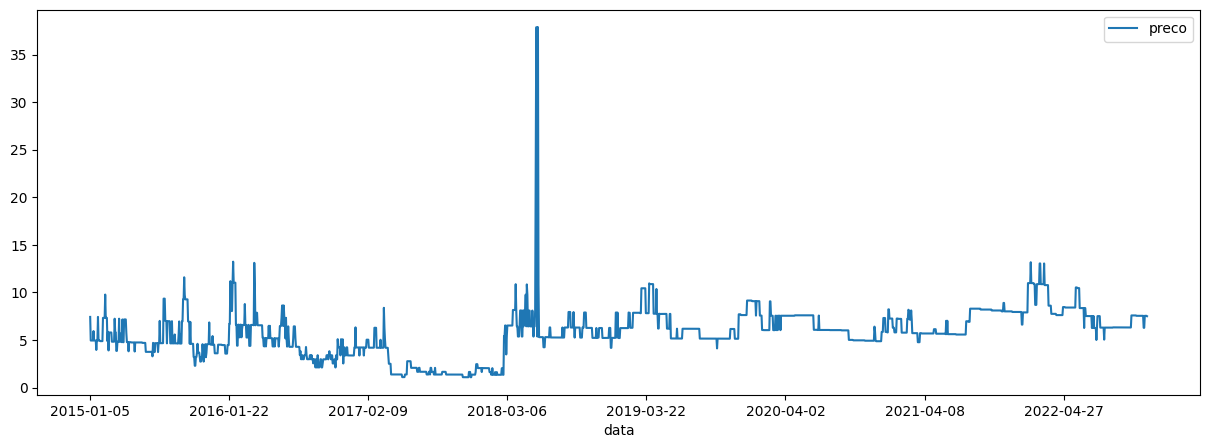

In [6]:
df = pd.read_csv('alface_corrigido.csv', parse_dates = True)
df = df.drop(df.columns[0], axis=1)
df = df.drop(df.columns[0], axis=1)
pd.to_datetime(df['data'])
df = df.set_index('data')
df.columns = ['preco']
df[['preco']].plot(figsize=(15, 5))

In [7]:
adresult(df['preco'])

Estatistica de teste: -3.50589441367447
P-valor: 0.007836997189585025
Estacionária


In [10]:
proporcao_treinamento = 0.8
indice_divisao = int(proporcao_treinamento * len(df))

treino = df[:indice_divisao]
teste = df[indice_divisao:]

print('Dados de treinamento:', len(treino))
print('Dados de teste:', len(teste))

Dados de treinamento: 1520
Dados de teste: 381


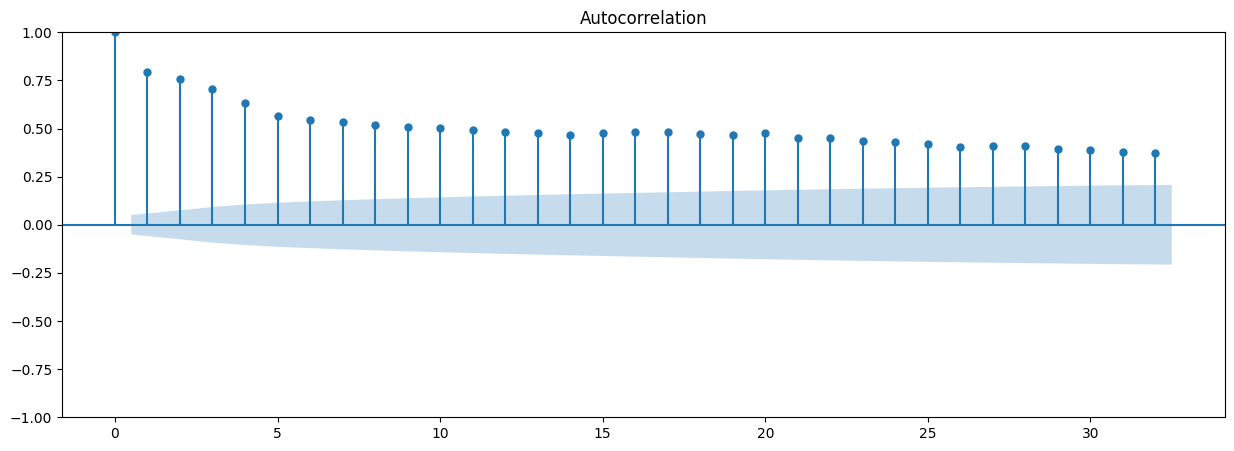

In [11]:
fig, ax = plt.subplots(figsize = (15,5))
plot_acf(treino['preco'], ax=ax);

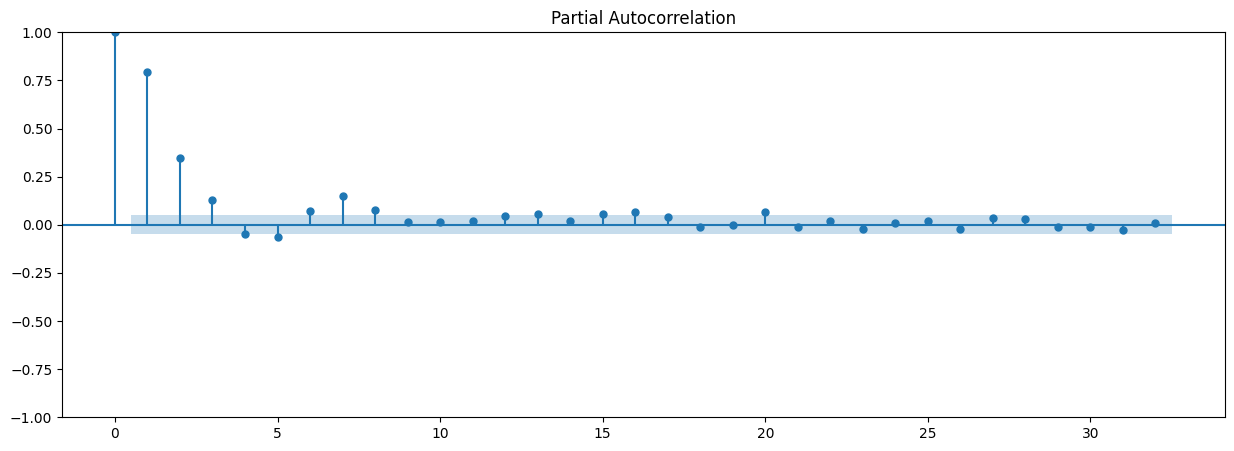

In [12]:
fig, ax = plt.subplots(figsize = (15,5))
plot_pacf(treino['preco'], ax=ax);

c:\Users\Miguel\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Miguel\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Miguel\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Miguel\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observatio

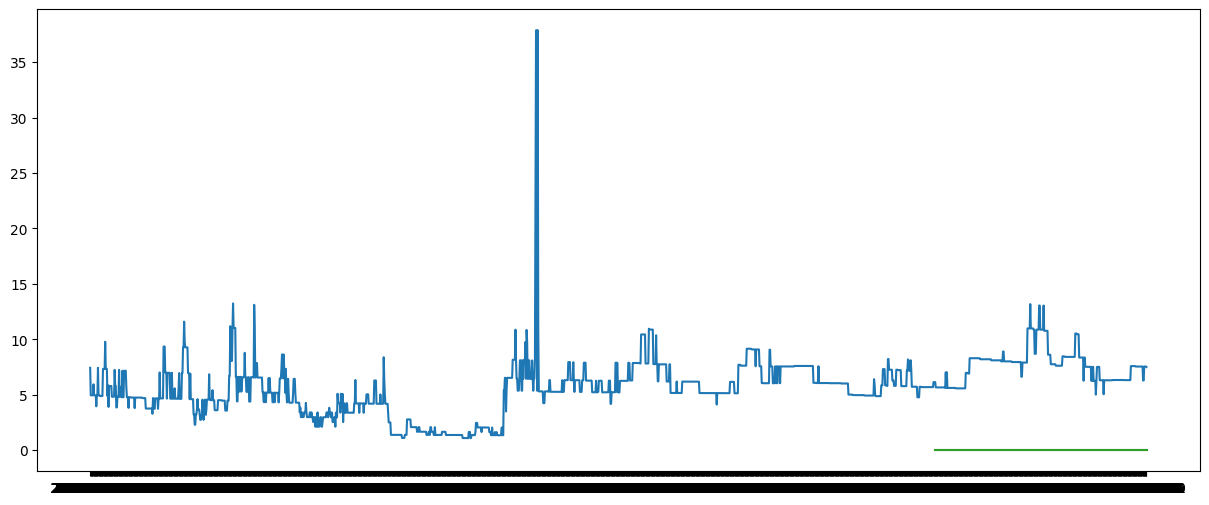

In [16]:
treino = pd.DataFrame(treino['preco'], index=pd.DatetimeIndex(treino.index))
modelo = sm.tsa.ARIMA(treino['preco'], order=(10,0, 4))
resultado = modelo.fit()
previsao = resultado.predict(start=len(treino), end=len(treino)+len(teste))  
fig = plt.figure(figsize=(15, 6))
plt.plot(df.index, df['preco'], label='Dados completos')
plt.plot(previsao.index, previsao, label='Previsões')
plt.plot(previsao.index, previsao, label='Previsões')